In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Dense , Input

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

7


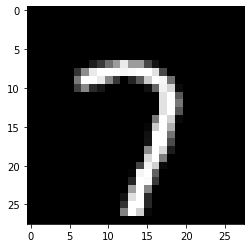

In [12]:
i = np.random.randint(0,59999)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')

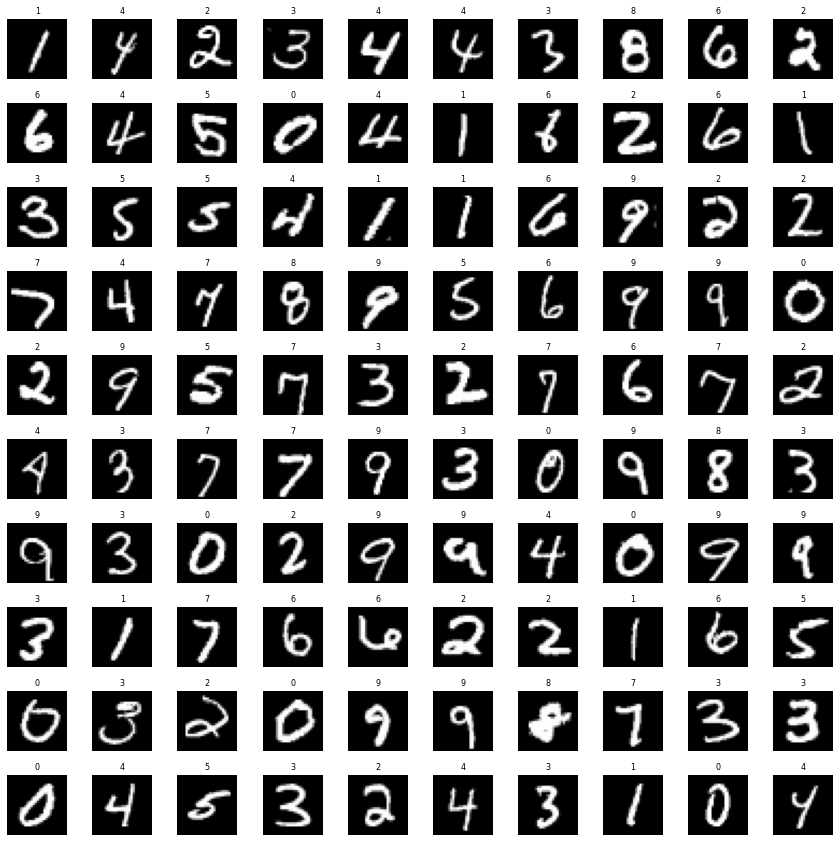

In [18]:
width = 10
height = 10
fig, axes = plt.subplots(height,width,figsize=(15,15))
axes = axes.ravel() # -> (10,10) -> 100

for i in np.arange(0,width * height):
  index = np.random.randint(0,59999)
  axes[i].imshow(X_train[index],cmap='gray')
  axes[i].set_title(y_train[index],fontsize=8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)  


In [19]:
 X_train[0].min() , X_train[0].max()

(0, 255)

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train.shape , X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [22]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [23]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_train.shape

(60000, 784)

In [24]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

In [25]:
# pixel reduction in hidden layers
# from 784 - 128 - 64 - 32 - 64 - 128 - 784

In [28]:
autoencoder = Sequential()

#Encode -:
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded Image

#Decode -:
autoencoder.add(Dense(units = 64 , activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units= 784 , activation = 'sigmoid'))

In [29]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [36]:
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [37]:
autoencoder.fit(X_train,X_train,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1512 - accuracy: 0.0104
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1089 - accuracy: 0.0117
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0998 - accuracy: 0.0126
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0949 - accuracy: 0.0125
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0922 - accuracy: 0.0130
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0903 - accuracy: 0.0131
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0889 - accuracy: 0.0136
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0876 - accuracy: 0.0135
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.0143
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.085

In [39]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [41]:
encoder = Model(inputs = autoencoder.input,outputs=autoencoder.get_layer('dense_2').output)

In [42]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


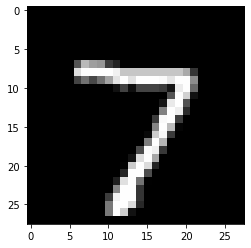

In [43]:
plt.imshow(X_test[0].reshape(28,28) , cmap = 'gray')

In [44]:
X_test[0].shape

(784,)

In [45]:
X_test[0].reshape(1,-1).shape

(1, 784)

In [46]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 98ms/step


In [48]:
8 * 4 

32

In [47]:
encoded_image, encoded_image.shape

(array([[2.5651255 , 7.5933013 , 1.6540883 , 5.7316656 , 4.88306   ,
         6.112516  , 0.50537235, 5.3248153 , 1.7774087 , 3.4742358 ,
         3.369586  , 1.7893968 , 6.5827503 , 5.775473  , 3.749582  ,
         7.5338655 , 1.9616122 , 3.4721706 , 1.8238772 , 6.351528  ,
         3.4461694 , 4.367319  , 4.1424775 , 8.638631  , 4.0508614 ,
         3.5268683 , 0.        , 1.7239406 , 0.        , 2.7534497 ,
         6.671606  , 3.1653907 ]], dtype=float32), (1, 32))

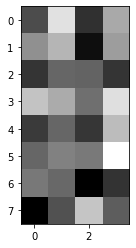

In [49]:
plt.imshow(encoded_image.reshape(8,4),cmap='gray')

In [50]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]

decoder = Model(inputs = input_layer_decoder, outputs= decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [51]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 351ms/step


In [52]:
decoded_image.shape

(1, 784)

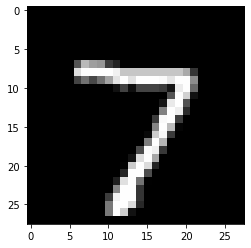

In [53]:
plt.imshow(X_test[0].reshape(28,28),cmap = 'gray')

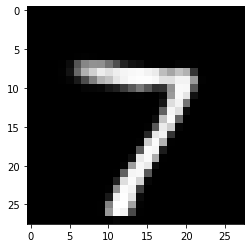

In [54]:
plt.imshow(decoded_image.reshape(28,28),cmap='gray')

1/1 [==============================] - 0s 30ms/step


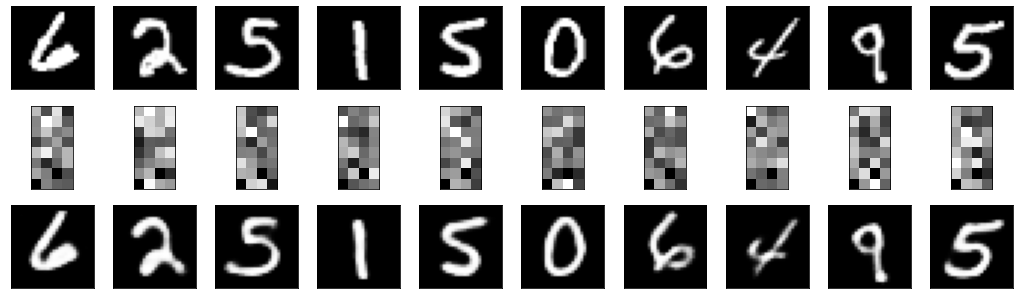

In [62]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0] - 1 , size = n_images)
# print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # print(i,image_index)
  # Orignal image 
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap = 'gray' )
  plt.xticks(())
  plt.yticks(())

  #Coded images
  ax = plt.subplot(10,10,i+1+n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap ='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i+1+n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())
  